# Analyzing Ford GoBike System Data
## by batoul alosaimi


## Investigation Overview
>Data visualization is an important skill that is used in many parts of the data analysis process. Exploratory data visualization generally occurs during and after the data wrangling process, and is the main method that you will use to understand the patterns and relationships present in your data. This understanding will help you approach any statistical analyses and will help you build conclusions and findings. This process might also illuminate additional data cleaning tasks to be performed. Explanatory data visualization techniques are used after generating your findings, and are used to help communicate your results to others. Understanding design considerations will make sure that your message is clear and effective.



## Dataset Overview

> This a dataset containing the trip data of the ford gobike approximately 183,412 with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are 9 numerical, and others are 2 datetime, 4 object type and 1 is boolean type.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/Users/batoul/Desktop/Project Template/fordgobike-tripdata.csv')

In [18]:
#changing data type of start_time to datetime.
df.start_time = pd.to_datetime(df.start_time)

In [19]:
#changing data type of end_time to datetime.
df.end_time = pd.to_datetime(df.end_time)

In [20]:
#change gender to category type
df.member_gender = df.member_gender.astype('category')

In [21]:
#Create column for user's age
df['Age']=2020 - df['member_birth_year']

In [22]:
df_age_abnormal = df[df['Age'] > 80]
df = df.drop(df_age_abnormal.index, axis=0)

In [23]:
#convert the "duration -second" to "duration-minutes"
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec' , axis = 1 , inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Multivariate Exploration

>I will analyze The relationship between trip duration and age is the key thing I want to explore in this project.




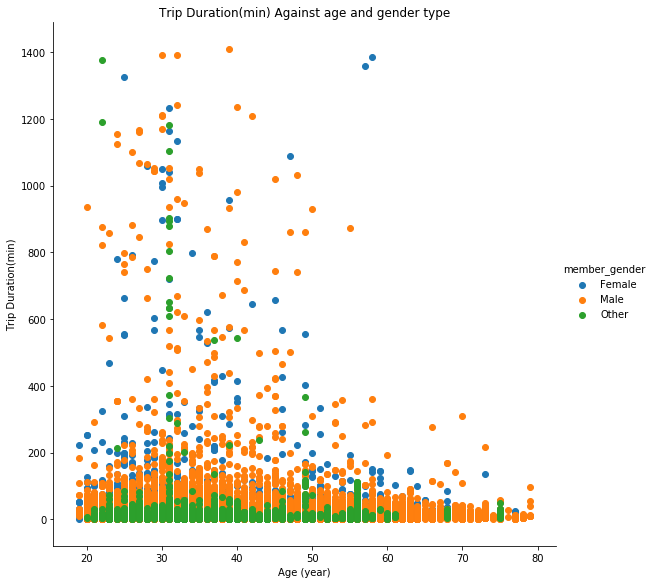

In [24]:
g = sb.FacetGrid(data =  df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'Age','duration_min', alpha = 1)
g.add_legend()
plt.title('Trip Duration(min) Against age and gender type')
plt.xlabel('Age (year)')
plt.ylabel('Trip Duration(min)');

>The plot is can not read, so I will split genders.


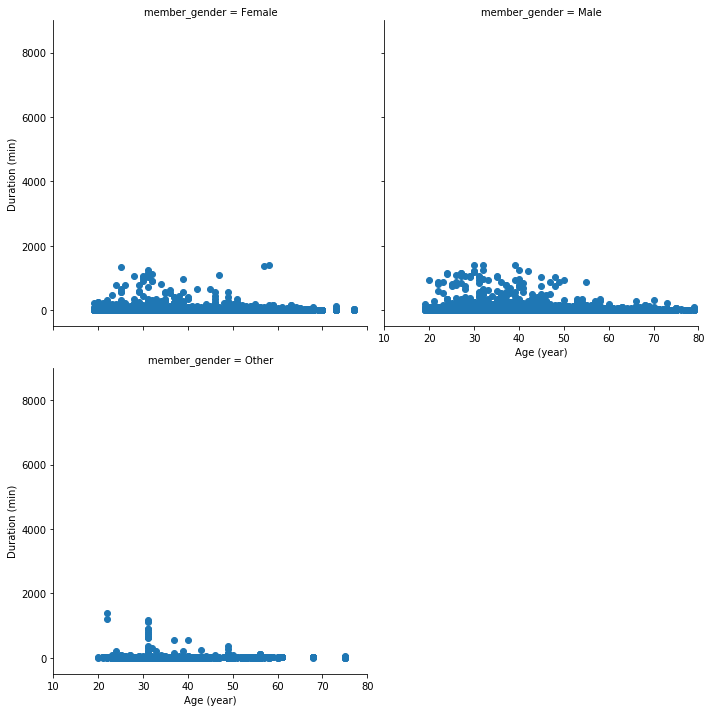

In [26]:
#Trip Duration, Gender, and Age
gender= sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'Age', 'duration_min', alpha=1)
gender.set_xlabels('Age (year)')
gender.set_ylabels('Duration (min)')

plt.show()

>Violinplot duration_min distribution per user type and gender to comparing.


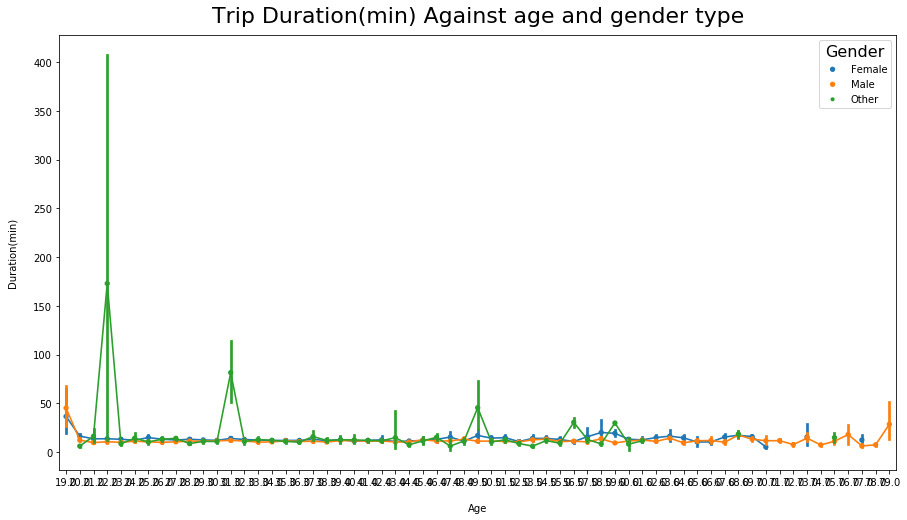

In [27]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='Age', y='duration_min', hue='member_gender', scale=.6, data=df)
plt.title('Trip Duration(min) Against age and gender type', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Duration(min)', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

### The conclusion
>Trip Duration is so dependable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages. For the age, duration, and gender, for the others leap at an older age around 60 years. also, It was interesting to note that "other gender"group had the most outliers in the data, as well as ages over 50 years.


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [9]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

/bin/sh: jupyter: command not found


In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')